In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import quadrotor

In [ ]:
#Part 2
#get_linearization function
# from sympy import *
# import sympy as sp

# #This is done to calculate the Jacobian to feed into the get_linearization function
# x = Symbol('x')
# vx = Symbol('vx')
# y = Symbol('y')
# vy = Symbol('vy')
# theta = Symbol('theta')
# w = Symbol('w')
# u1 = Symbol('u1')
# u2 = Symbol('u2')
# z = sp.Matrix([[x], [vx], [y], [vy], [theta], [w]])
# u = sp.Matrix([[u1],[u2]])
# f = sp.Matrix([[x+dt*vx],[vx-(dt/m)*(u1+u2)*sin(theta)], [y+dt*vy], 
#                [vy+(dt/m)*(u1+u2)*cos(theta)-(dt*g)], [theta+dt*w], [w+(dt*r*(u1-u2)/I)]])
# dfdx = f.jacobian(z)
# dfdu = f.jacobian(u)

dt = quadrotor.DELTA_T
m = quadrotor.MASS
g = quadrotor.GRAVITY
r = quadrotor.LENGTH
I = quadrotor.INERTIA


def get_linearization(z,u):
  x = z[0]
  vx = z[1]
  y = z[2]
  vy = z[3]
  theta = z[4]
  omega = z[5]

  u1 = u[0]
  u2 = u[1]

  dydt = np.zeros([quadrotor.NUMBER_STATES,])
  dydt[0] = vx
  dydt[1] = (-(u[0] + u[1]) * np.sin(theta)) / m
  dydt[2] = vy
  dydt[3] = ((u[0] + u[1]) * np.cos(theta) - m * g) / m
  dydt[4] = omega
  dydt[5] = (r * (u[0] - u[1])) / I

  

  dfdx = np.array([[1,dt,0,0,0,0], [0,1,0,0,-(dt*(u1+u2)*np.cos(theta))/m,0], [0,0,1,dt,0,0],
                   [0,0,0,1,-(dt*(u1+u2)*np.sin(theta))/m,0], [0,0,0,0,1,dt], [0,0,0,0,0,1]])
  
  dfdu = np.array([[0,0], [(-dt*np.sin(theta))/m, (-dt*np.sin(theta))/m], [0,0],
                   [(dt*np.cos(theta))/m, (dt*np.cos(theta))/m], [0,0], [(dt*r/I), -(dt*r/I)]])
  
  A = dfdx
  B = dfdu

  return A,B
                   

In [ ]:
# we can simulate the robot but we need to provide a controller of the following form
#Writing a controller for Part 2
def dummy_controller(state, i):
    """
        the prototype of a controller is as follows
        state is a column vector containing the state of the robot
        i is the index corresponding to the time step in the horizon (useful to index gains K for e.g.)
        
        this controller needs to return an array of size (2,)
    """
    z_star = z0
    u_star = u0

    A, B = get_linearization(z_star,u_star)

    m = 1000
    n = 1
    Q = np.array([[m,0,0,0,0,0],[0,m,0,0,0,0],[0,0,m,0,0,0],[0,0,0,m,0,0],[0,0,0,0,m,0],[0,0,0,0,0,m]])
    R = np.array([[n,0],[0,n]])

    A_T = A.transpose()
    B_T = B.transpose()

    
    for j in range(1000,-1,-1):
      if j==1000:
        Pn = Q
        term = R + B_T@Pn@B
        inv_term = np.linalg.inv(term)

        K = -inv_term@B_T@Pn@A
        P = Q + A_T@Pn@A + A_T@Pn@B@K
        Pn = P
      else:
        term = R + B_T@Pn@B
        inv_term = np.linalg.inv(term)

        K = -inv_term@B_T@Pn@A
        P = Q + A_T@Pn@A + A_T@Pn@B@K
        Pn = P

    state = state.reshape((6,1))
    z_star = z_star.reshape((6,1))
    u_star = u_star.reshape((2,1))
    un = K@(state-z_star)+u_star
    un = un.reshape((2,))

    return un




# we can now simulate for a given number of time steps - here we do 10 seconds
horizon_length = 1000
z0 = np.zeros([quadrotor.NUMBER_STATES,])
u0 = np.array([[(m*g)/2], [(m*g)/2]])
u0 = u0.reshape((2,))
t, state, u = quadrotor.simulate(z0, dummy_controller, horizon_length, disturbance = True)

Text(0.5, 0, 'Time [s]')

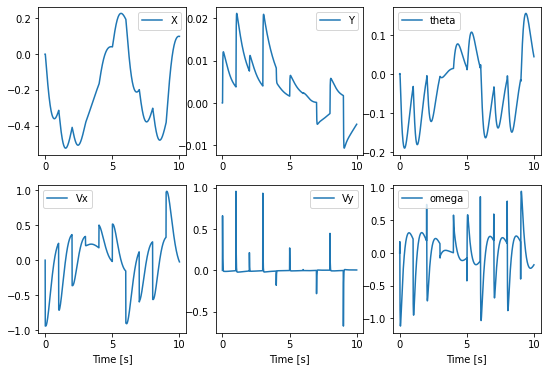

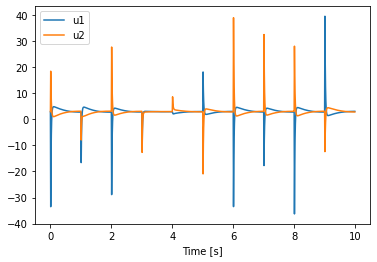

In [ ]:
# we can plot the results
#%matplotlib notebook
#%matplotlib inline
plt.figure(figsize=[9,6])

plt.subplot(2,3,1)
plt.plot(t, state[0,:])
plt.legend(['X'])

plt.subplot(2,3,2)
plt.plot(t, state[2,:])
plt.legend(['Y'])

plt.subplot(2,3,3)
plt.plot(t, state[4,:])
plt.legend(["theta"])

plt.subplot(2,3,4)
plt.plot(t, state[1,:])
plt.legend(['Vx'])
plt.xlabel('Time [s]')

plt.subplot(2,3,5)
plt.plot(t, state[3,:])
plt.legend(['Vy'])
plt.xlabel('Time [s]')

plt.subplot(2,3,6)
plt.plot(t, state[5,:])
plt.legend(['omega'])
plt.xlabel('Time [s]')

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1', 'u2'])
plt.xlabel('Time [s]')

In [ ]:
# now we can also create an animation
quadrotor.animate_robot(state, u)

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAABKwG1kYXQAAAKuBgX//6rcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTUyIHIyODU0IGU5YTU5MDMgLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE3IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9MyBsb29r
YWhlYWRfdGhyZWFkcz0xIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFj
ZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJh
bWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdl
aWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MTAgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVz
aD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBx
cG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAA0aZYiE
ABD//veBvzLLXyK6yXH5530srM885DxyXYmuuNAAAAMAAAMAAI14KuH+4x2xPbAAAArgAVwJEflN
mb8DmfAA1kov4/zm1i92+Wmozi+t/nsZxdy3nhm9N0dU2Ch+HnxnRffcMUM0vcXaMOvIWdTEb2iW
pXgCvyvMZdxHEjn6kQLwZY+eI9HwO0bAwtMjFQE9fAIULeo/hYnUqXMC0Y/wjcDTATaPPQIbVqXY
VluZnN5RLnikID6Hm/8nxlSM8+haS3iz1WrT79sjH28WhNjd+4He7LMSizSHqfM2AnkqOs+lLhyV
S7KEHXTf//cYTN4Y/H4EQOsEn+fRQnByTtvyfQQYR4YXxXn0lCN8M6aAaZwBszpByTVKHGiwlstA
AA15lwDieDGacoYJmHmGEkI3H2rZltf1twhqtU/bOrw4wCDoktHpYWfSvacHj3keG271AEsOkcWq
5qENlWn9UqE1TZPiv18AQoZbQi+g19I/eEa3C2Q83fyVVfKoWGJgrSm3B6AyVXoSqUgAPgKF1mG8
LfqgyphyavpmJ0ZON1fp+iQIybkTJkKJMk4dT0DJ1bpM2vUIfnaLabAalmnSVB72X/E0SLBbE/BZ
ybeKmcMrdjNgwHo0YuVJeEDRuLa53Y9yVMbCLl3yvO39PKpAYh+gPtcDR0ZXxvUzUr49aG3aOHRm
L+mdL8evxUDBoMygS6m7RNfR8CDeugLEEC8VHkFbs+bMD+ZixV4CRR4Cdq1GeuOpTDPyVi/YZOwj
pI1IXAkedASPiGgUAACjDFdE95YbVBGT5JsuwVA8Y8Ejwa6i48C4AfHJmbZAnJO0IX6jlKAKVJGi
oGvOd/fuutIIwttPJUaBvh5gqhbUhVfHwKegsx3/WU5p/o449yai5Rl6EiZP4ctvY1lPIfB8wC4x
7o1otPzIqqYnPOp/94hTAcM4AAujBP+9GSVQlVo6YXYxkh24kKN8BdIcJ2DnNd9zzJBQ1iTrDuEk
MCfY3vDtgJwtXVHwGyAncfaC/imDXcee8KCMFacxmO0soT63sigqkDHJA0PeUhtlXg5VlBkC7MPo
OCmNwVPcpe1onFCz06IvKwdgncPsP9ZI/uacq0ATMc9jgGUk6EovCcnal5+AAABB70GwRNab8gRM
2eSVBh0aZ/Nw3fkLNsRiMiukQSkuPEmiKCbmOAG0mlZVXvuz4m07fqixwO1LGhNuCIJOheMkbjbW
1aWtUaNXcyblgVqjV83v759MNlQNcrMhmQYqlxTvINGENOVPvo1rKGNUai+oT621AkGUapbhNTQf
/6yJMyLTv4sxcBCmcECbd8HrM4PGMJtQbVYkkRhGatJJtMX3TrggjzMkBiN3g+xQRw+Nog0ERaxn
vucLnNxS9MAfWraiHA7kjYU28vVGevvZdbJJVLwhUfd5/1KaPvftmXng9ifFXZ2VzH0C6FpMSSob
I4vNjVSrBC2tA/X28AcYtRT7gAAAAwALtY7GMfgj6KIp+H0iIbUKptSexBR5/8jLDxqOHJBC0XRy
awKkvQpzchmTaA//69/sbq4m8qU3ghg85IUC7W8mcs2RyANr7+WuYzu81tXmH2PhJIrk2kkAzdl5
JaWg5ybRTvB9oHPzq/EkTgVMuObeFMymkAn+tln54DXohTiLer/h9hYebmGbdzhphybub6Il29ai
1q359KfbHd/wsT6TCKLLad4jR9K6hVOOauS7hhzc9he5Daf/C0p3ls3EohcU6NtK3bsd5eSTDu8U
7pZvuGzHgneUho45rwiMt1gQQFoQX4WwHxihFGG4dyVRYAcel7eznZvg3Wi2p2zBKM0xFoJMMLIr
uYoqzcEI5+MeKhJzO54xTkwNvBxaBcRVYd35Km9tvbsFZfEnbl6GLP44GRPC3foW43f8XU94hSaY
4pUDWX/VA3kM5HQ4bVJHogVhD8uOuaKCvW88ZIvAmjTRXddbZyzdGvEqYHy88GJPdqAaQgZsEhXC
87AmBN2yfv8P1eLomhCQMpTolsdhyS3MMEXuay0TwSzwQQjGcvCG0q5yh5Cor1u7kcjUVWwRki2Z
4scHWH0BE4aWmAAGQ38AAB6YlG0w6CEMwky9nA8R4n+iGmEU++0NvE0dXXZnFRUZXs6bUpengd3E
d0ZjrXOrpE8gQ01pyq7DW2FSsSLZWPdUo1Py88We3HU/k0vbRBfHXXDxeI3JcdIVfnJOCvq16Wu0
St2Plso9ybdVAW9yk6ZCvkN96vct7+cD6I8X4Fq2WY2L5VSf30pvvQBvf/CA8RjOeM4VN2JznqRu
zHeaJNLme311uUlLj6XxztGS4UoNdbXCH///N147jGg9xH/N3Zo/G0mm8M27Mvr/Vjv4IDZaLmeg
6DhEn38tTkXxw69WJxtp7jGf43bIBOILfJAC5lc68DnHUUAAQUfCfAAABaibFpRTsy+qww5n+G2q
xscLAtnCL/A1t3j2tz74rHtKVEbWykMALijPHy6u8F7As7M8TpLU8uRLRpRpz0i0XgP+cCWeN0cP
8iD7TPNMgt/cf1P/wBdeALwqFAtt9IXUsafGNzoIFjxkhbU/urqH69Dx8k6+jv0NeG081cPQCeid
v//OWyTc7r2t+CimcFc6znOXmHpjIgAHt4hZnKNxSXfe0cSEJT9mgKCHmITs0bLonBmN+TSu+zDw
QoqzqEDgGwMFdAzIrPE924lqoQw1NjjumtqJwZgKSXdd7b/MOzVgAAADAAbg8YG6W3zf4UxHFT0d
9WNs6veJmq8exYC7b0vwH88Obh832/OffLP28WA/skWr0Ox//xQ0M5xk9/Fgq8d26Bp01pgo+Qny
h8Zs7YQ/jK5GEiWoC/PmNLiC5oq7qDw0DCqlPtkk4JO1awZGj1h65ZGDiNhtD306ygz/Hu//xAh2
/GfYyTXVU35SNSyqKfinE